About to read...
...read
['replay(B)' 'Gian Iphone(A)' 'Portable ECG moniter(A)'
 'Bodimetrics Performance monitor(A)' 'Apple Watch(A)'
 'Eko Stethescope(A)' 'iHealth Blood Pressure(A)'
 'iHealth Blood Pressure(B)' 'Fever Sense(A)' 'Portable ECG(B)'
 'replay(A)' 'Fever Sense(B)' 'iHealth gluco(A)' 'iHealth gluco(B)'
 'Omron V10(A)' 'Pyle Health(B)' 'Pyle Health(A)' 'Portable_ECG(A)'
 'Eko Sthethoscope(A)']

RandomForest d=22 n_est=55
fit_time: 0.5483780340714888
score_time: 0.01959182999350808
test_acc: 0.9485809625501733
train_acc: 0.9998141338893035
test_prec_macro: 0.9407367216123391
train_prec_macro: 0.9998720337034643
test_rec_micro: 0.9226690305185522
train_rec_micro: 0.9996385880662179


Empty DataFrame
Columns: [Amplitude__absolute_sum_of_changes, Amplitude__augmented_dickey_fuller__attr_"teststat", Amplitude__augmented_dickey_fuller__attr_"usedlag", Amplitude__autocorrelation__lag_1, Amplitude__autocorrelation__lag_3, Amplitude__autocorrelation__lag_4, Amplitude__autocorrelati

ValueError: Found array with 0 sample(s) (shape=(0, 49)) while a minimum of 1 is required.

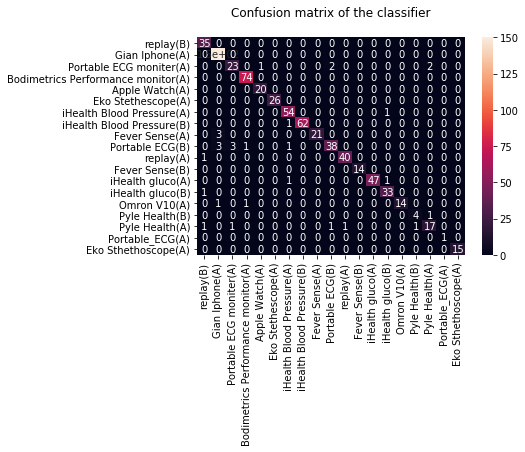

<Figure size 720x432 with 0 Axes>

In [2]:
#THaW Project
#This program is meant to establish the accuracy of predicting device name from the data collected by MSU
#6/12/2019
#Code Written By: Manzi Bryan with a lot of help from https://www.kaggle.com/nageshnaik/iris-dataset-classfication-using-naive-bayes

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import sklearn
from sklearn import model_selection
from sklearn.model_selection import *
import pylab as pl
import pandas as pd
import os
import math
from path import Path
import warnings
import pickle
import operator
import time
import seaborn as sns

warnings.filterwarnings("ignore", 
                        category=sklearn.exceptions.UndefinedMetricWarning)# for some reason, was getting some 
                                                                        # warning when I looked for precision using
                                                                        #Naive Bayes


table = pd.DataFrame(index = [0], columns = ['Device', '# train', '# test', 'Accuracy', 'Precision_micro', 
                                                      'Precision_macro', 'Precision_weighted', 'Recall_micro', 
                                                      'Recall_macro','Recall_weighted','F1_micro', 'F1_macro', 
                                                      'F1_weighted', 'Avg Conf', 'Std Conf'])

# This method is meant to build a Random Forest Classifier given a dataframe with devices as targets
# The dontTrainOn parameter is meant to tell the classifier to leave one tenth of one device out of training

def classify(df, functionName, function, k):
    save = df[df.Device == dontTrainOn]
    numReadings = len(save)
    
    df = df[df.Device != dontTrainOn] # Drop everything we do not want to train on
    ratio = 10
    ninety = [df, save[save.index % ratio != k]]
    df = pd.concat(ninety) # Concatenate one tenth of readings on the dataframe
    devices = df['Device'].unique()
    i = 0
    print(devices)
    df.Device.replace(devices, range(0, len(devices)), inplace=True)
        
    Y = df['Device'].tolist()
    
#     print("There are " + str(len(devices)) + " devices")
    copydf = df.copy()
    
    #Remove labelling columns from the index
    copydf = copydf.drop(columns= ['Device', 'Model', 'App', 'Distance'])
    X = copydf.values
    
    #Initialize GNB
    clf = function
    
    
    #One tenth of the data as test
    validation_size = 0.1
    
    seed = 7
    
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                    test_size=validation_size, random_state=seed)
    
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
    
    #Fitting the training set
    clf.fit(X_train, Y_train) 
#     pd.DataFrame(clf.feature_importances_, index = X_train.columns,
#     columns=['importance']).sort_values('importance',ascending=False)

    
    #Create the prediction file by concatenation of the original data and predictions
    #Reshaping needed to perform the concatenation
    size = math.ceil(validation_size*df.index.max())
    
    
    numFeatures = len(X_validation[0])#includes subRegion as a feature
    
   
    #Model Performance
    #setting performance parameters
    kfold = model_selection.StratifiedKFold(n_splits=11, random_state=seed) #same number of samples from each 

    #calling the cross validation function
    
    cv_results = cross_validate(clf, X_train, Y_train, cv=kfold, scoring=scoring, return_train_score=True)
    
    filename = functionName  + 'Model.sav'
    pickle.dump(clf, open(filename, 'wb'))
    

    print('\n' + functionName)
    
    for metric in cv_results.keys():
        print(metric + ": " + str(cv_results[metric].mean()))
    print('\n')
    
    # Confusion Matrix
    pred_clf = clf.predict(X_validation)
    cm = confusion_matrix(Y_validation, pred_clf)
    
    cm_df = pd.DataFrame(cm,devices,devices)                      

    matrix = sns.heatmap(cm_df, annot=True)
    pl.title('Confusion matrix of the classifier\n')
    pl.figure(figsize = (10,6))
    pl.savefig('ConfusionMatrixofClassifer')
    
    
    save = save[save.index % ratio == k]
    print(save)
    makePrediction(filename, save, devices, numReadings, dontTrainOn)
    accuracy = [functionName, cv_results['test_acc'].mean()]

    return accuracy
    
    #TODO optimize the trees

def looper(df):
    
    dontTrainOn = 'Fever Sense 1'
    
    functions = {}
    functions['RandomForest d=5 n_est=25 '] = RandomForestClassifier(n_estimators=14, max_depth=25)
    functions['RandomForest d=22 n_est=55'] = RandomForestClassifier(n_estimators=22, max_depth=55)
    
    devices = df['Device'].unique()
    
    for functionName in functions:
        df = pd.read_excel(path)
        
        df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)#Remove unnecessary columns from the index
#         df.drop(df.columns[df.columns.str.contains('Bursts',case = False)],axis = 1, inplace = True)#Remove unnecessary columns from 
#         for device in devices:
#             k = 0
#             for k in range(10):
        classify(df, functionName, functions[functionName], 'device', 0)
    return devices
    

def getNumerical(devices, y):
    i = 0
    
    for device in devices:
        if device == y[0]:
            return [i] * len(y)
        i += 1

def makePrediction(model, unseen, devices, numReadings, deviceName):
    loadedModel = pickle.load(open(model, 'rb'))
    unseen = unseen.reindex(sorted(unseen.columns), axis=1)
    
    unseen.drop(unseen.columns[unseen.columns.str.contains('Unname',case = False)],axis = 1, inplace = True)
    
    y = unseen['Device'].tolist() #unseen should only contain one device, hence y is a list of the same device repeated
    
    
    unseen = unseen.drop(columns= ['Device', 'Model', 'App', 'Distance'])
    print(unseen)
    predictions = loadedModel.predict(unseen)
    
    predictions_proba = loadedModel.predict_proba(unseen)
    i = 0
    other = 0
    guesses = predictions_proba[0]
    for i in range(1, len(predictions_proba)):
        guesses = [guesses[j] + predictions_proba[i][j] for j in range(len(predictions_proba[i]))]
            
    total = sum(guesses)
    print(total)
    guesses[:] = [x * 100 / total for x in guesses]
    guesses[:] = [round(x, 2) for x in guesses]
    dictionary = dict(zip(devices, guesses))
    dictionary = sorted(dictionary.items(), key=operator.itemgetter(1))
    
    confidence = max(guesses)
    print(dictionary)
    
    j = 0
    correct = 0
    incorrect = 0
    semicorrect = 0
    iphone = 0
    print(len(y) == len(predictions))
    for j in range(len(predictions)):
        if y[j] == devices[predictions[j]]:
            correct += 1
        else:
            
            if y[j][:-2] == devices[predictions[j]][:-2]:
                semicorrect += 1
            else: 
                if devices[predictions[j]] == 'Gian Iphone':
                    iphone += 1
                incorrect += 1
                
    print("we got " + str(correct) + " correct and we got " + str(semicorrect) + " semicorrect and we got " + str(incorrect) + " incorrect"  )
    print("iphone count is " + str(iphone))
    
    addToTable(devices, y, predictions, numReadings, deviceName, confidence)
    
# This method is meant to help build the results table
def addToTable(devices, y, predictions, numReadings, deviceName, confidence):
    global table
    smallTable = pd.DataFrame(index = [0], columns = ['Device', '# train', '# test', 'Accuracy', 'Precision_micro', 
                                                      'Precision_macro', 'Precision_weighted', 'Recall_micro', 
                                                      'Recall_macro','Recall_weighted','F1_micro', 'F1_macro', 
                                                      'F1_weighted', 'Avg Conf', 'Std Conf'])
    
    correctDevice = getNumerical(devices, y)
    
    smallTable['Device'][0] = deviceName
    
    smallTable['# train'][0] = numReadings - len(predictions)
    
    smallTable['# test'][0] = len(predictions)
    
    smallTable['Accuracy'][0] = accuracy_score(correctDevice, predictions)
    
    smallTable['Precision_micro'][0] = precision_score(correctDevice, predictions, average='micro')    
    smallTable['Precision_macro'][0] = precision_score(correctDevice, predictions, average='macro')
    smallTable['Precision_weighted'][0] = precision_score(correctDevice, predictions, average='weighted')
    
    smallTable['Recall_micro'][0] = recall_score(correctDevice, predictions, average='micro')
    smallTable['Recall_macro'][0] = recall_score(correctDevice, predictions, average='macro')
    smallTable['Recall_weighted'][0] = recall_score(correctDevice, predictions, average='weighted')
    
    smallTable['F1_micro'][0] = f1_score(correctDevice, predictions, average='micro')
    smallTable['F1_macro'][0] = f1_score(correctDevice, predictions, average='macro')
    smallTable['F1_weighted'][0] = f1_score(correctDevice, predictions, average='weighted')
    
    smallTable['Avg Conf'] = confidence
    
    
    
#     print(smallTable)
    table = table.append(smallTable)
    print(table)
    
    
if __name__ == "__main__":
    
    path=r'C:/Users/brnma/newFeatures.xlsx'
    
    print("About to read...")
    df = pd.read_excel(path) #Comment this out to run much faster
    print("...read")
    df = df.reindex(sorted(df.columns), axis=1)
    looper(df) # comment this out to run faster
    
    devices = df['Device'].unique()
    
    table.to_excel('table.xlsx')

